In [2]:
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
import fusion
import time
import numpy as np


# Visualization of trace img in files

In [3]:
# Bad images
# Circles
bad_img_circl = [280, 292, 287, 377]
# Horizontal line
bad_img_hor = [85]
# Vertical line
bad_img_vert = []

In [4]:
def start_angle(a):
    norm = sum(a ** 2) ** 0.5
    a = a / norm
    ψ = np.arcsin(a[0])
    ϕ = np.arctan2(a[1], a[2])
    return ψ, ϕ

def visualize_file(file_name, line_threshold = 0):
    data = []
    n_line = 0
    with open(file_name,'r') as f:
        for line in f:
            result = re.findall(r"-?\d+.\d+", line)
            if len(result) == 10:
                data.append([float(x) for x in result])
                n_line += 1
            
    if n_line < line_threshold:
        return 
                
    pitch, roll = start_angle(np.array(data[0][1:4]))
    fusioner = fusion.Fusion(roll=roll, pitch=pitch)
    dtime = 0.02
    angles = []
    for a in data:
        fusioner.update_nomag(dtime, (a[1], a[2], a[3]), (a[4], a[5], a[6]))
        #fusioner.update_nomag(a[0], (a[1], a[2], a[3]), filtered_g)
        angles.append([fusioner.pitch, fusioner.heading, fusioner.roll])
    angles[0] = angles[1]
    
    data_x = [x[1] for x in angles]
    data_y = [x[0] for x in angles]
    plt.plot([x[1] for x in angles], [x[0] for x in angles])
    plt.ylim(-90, 90)
    plt.xlim(-90, 90)
    plt.show()
    
def number_of_lines(file_name):
    data = []
    n_line = 0
    with open(file_name,'r') as f:
        for line in f:
            result = re.findall(r"-?\d+.\d+", line)
            if len(result) == 10:
                n_line += 1
    return n_line

0


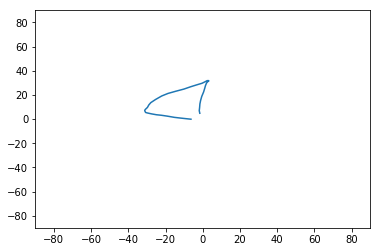

1


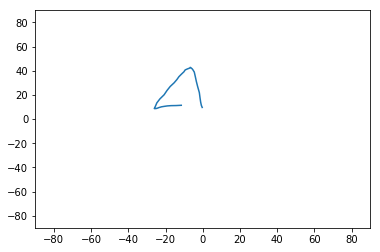

2


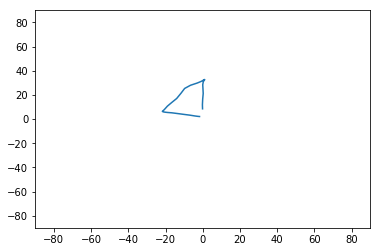

3


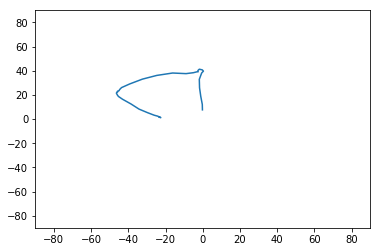

4


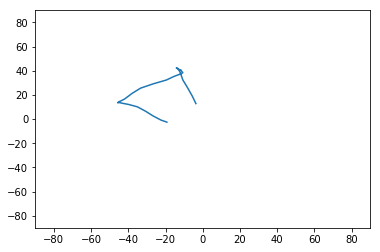

5


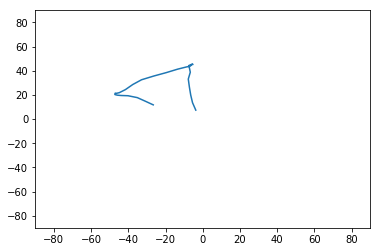

6


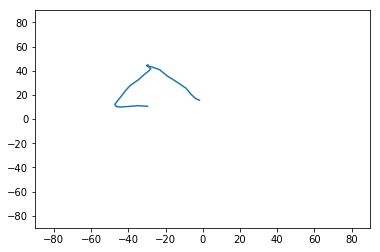

7


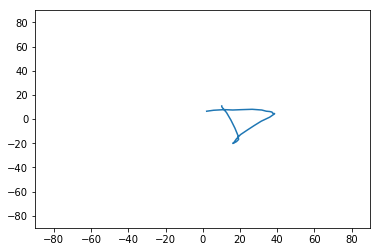

8


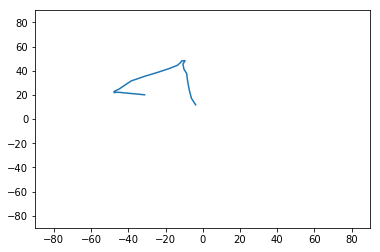

9


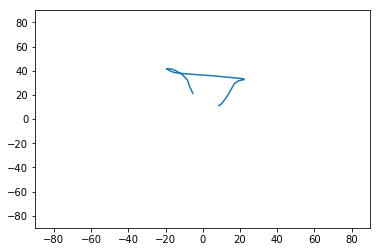

10


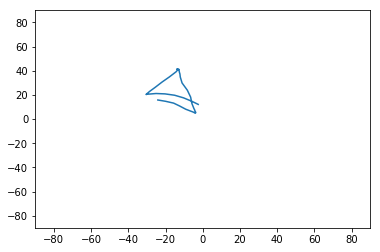

11


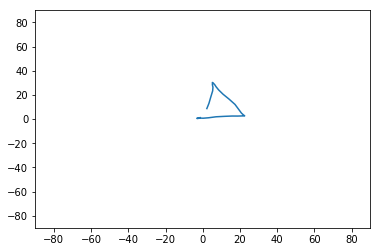

12


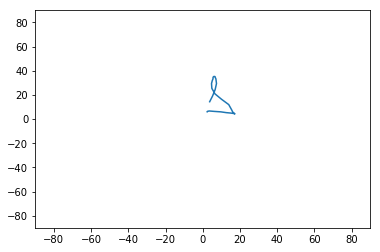

13


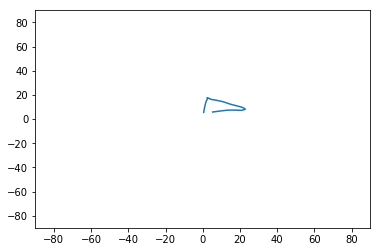

14


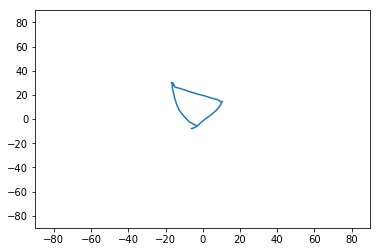

15


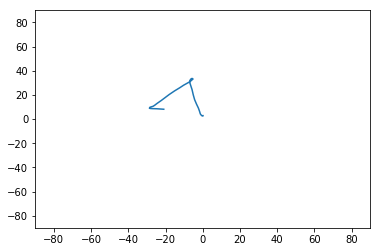

16


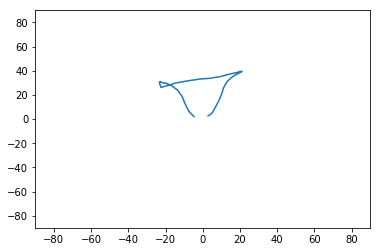

17


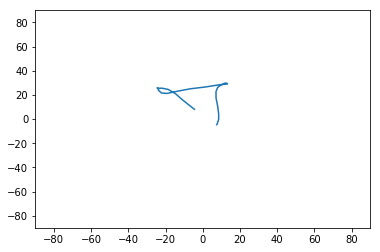

18


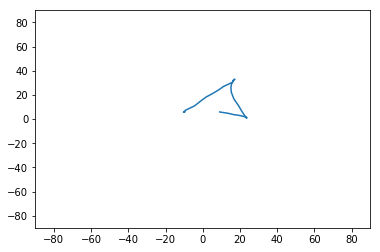

19


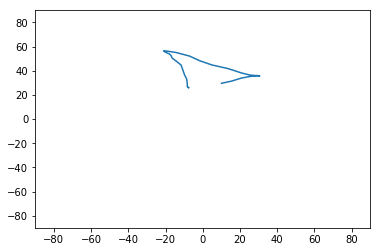

20


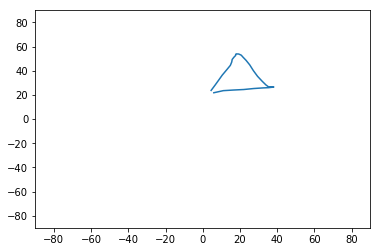

21


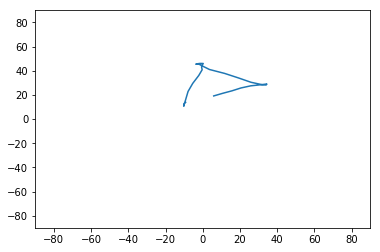

22


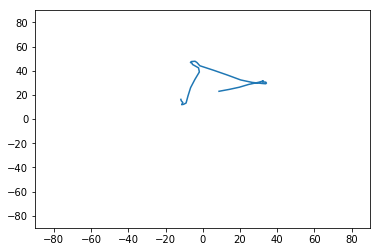

23


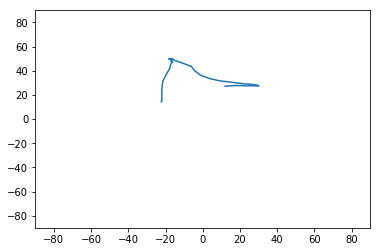

24


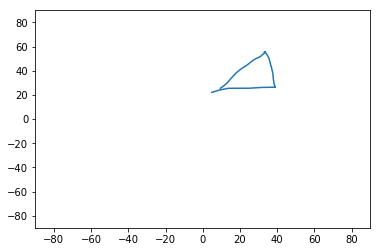

25


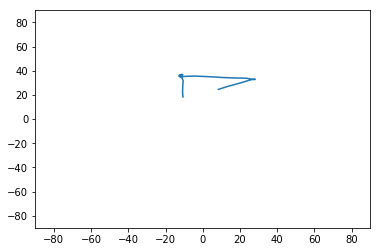

26


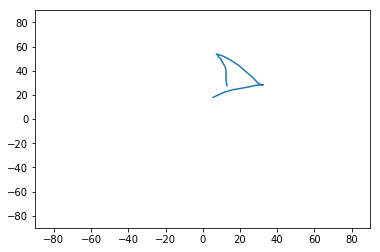

27


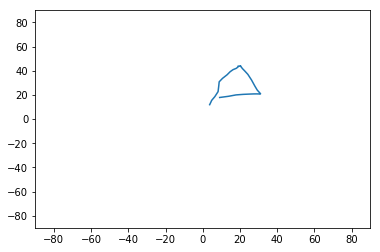

28


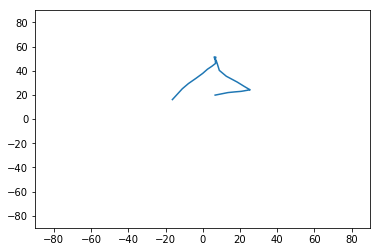

29


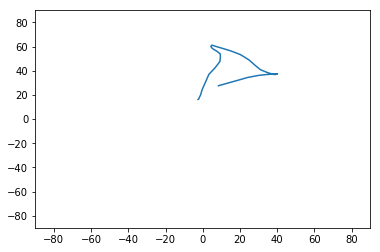

30


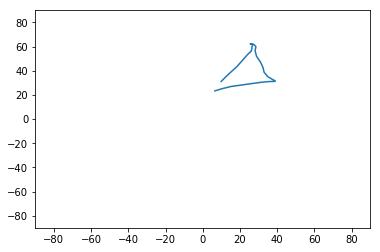

31


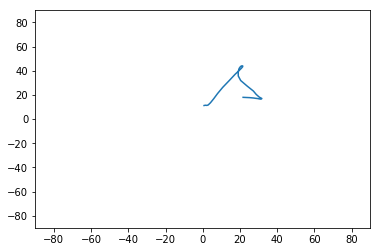

32


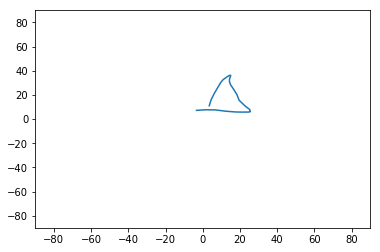

33


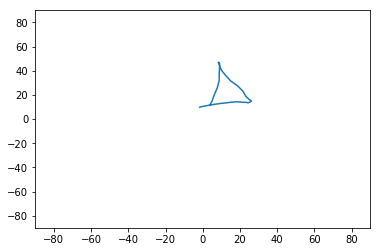

34


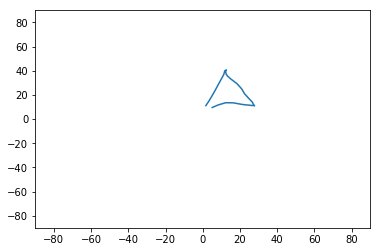

35


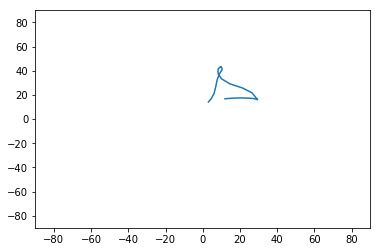

36


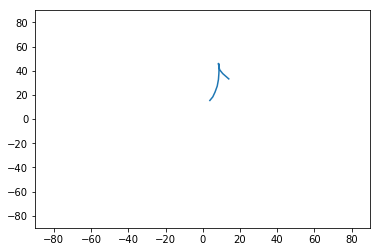

37
38


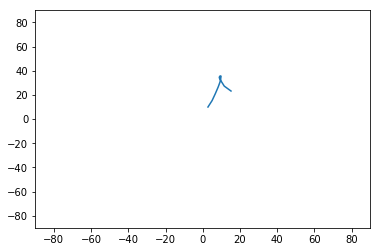

39
40


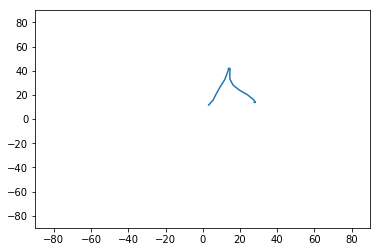

41


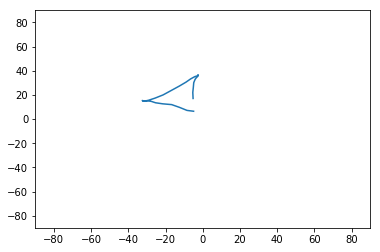

42


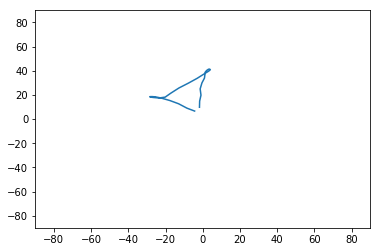

43


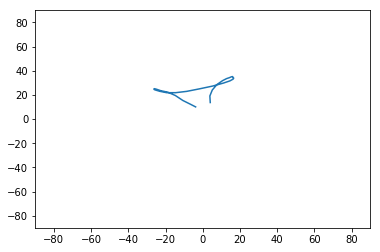

44


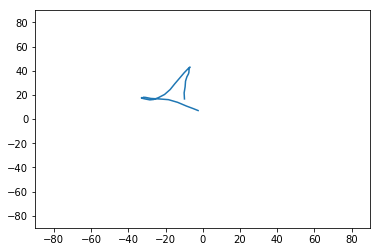

45


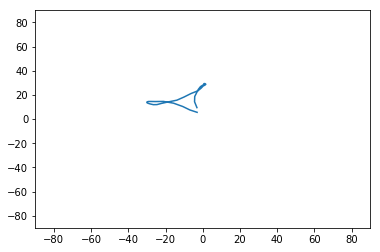

46


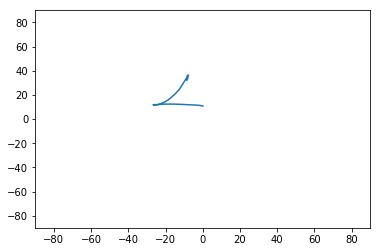

47


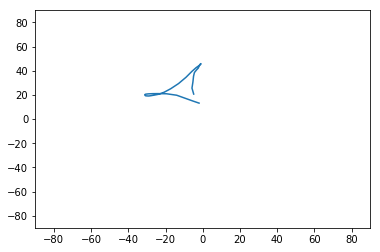

48


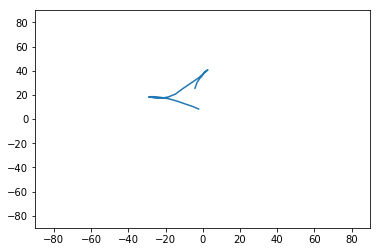

49


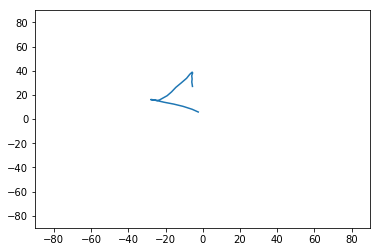

50


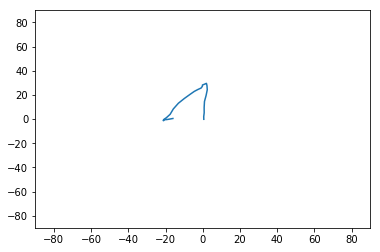

51


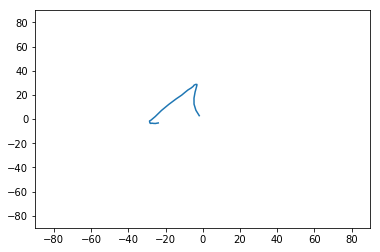

52


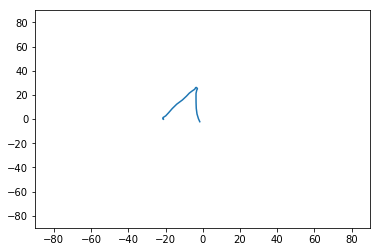

53


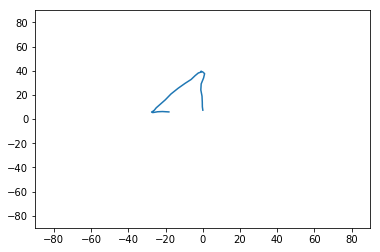

54


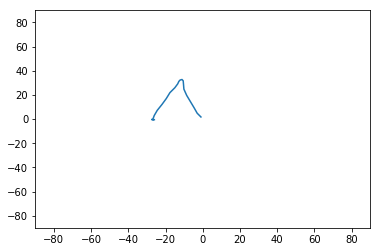

55


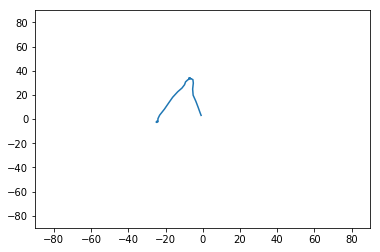

56


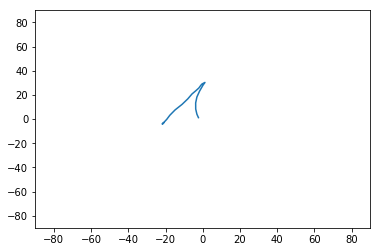

57


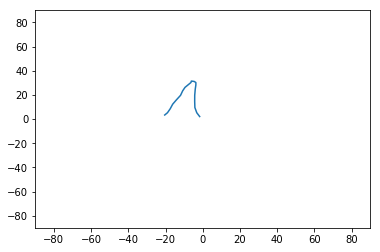

58


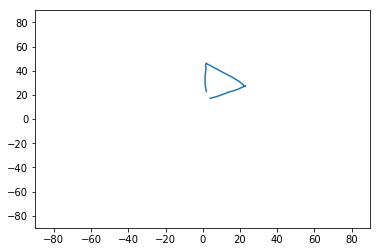

59


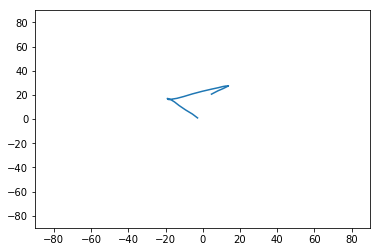

60


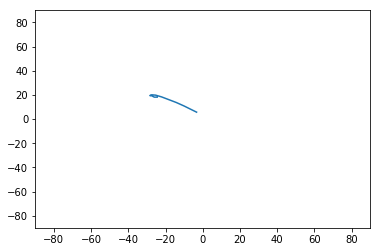

61
62


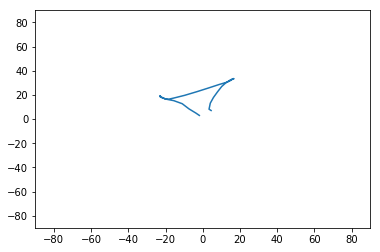

63


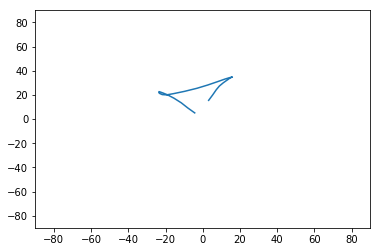

64


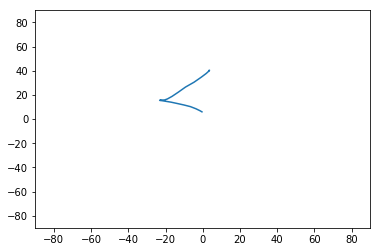

65


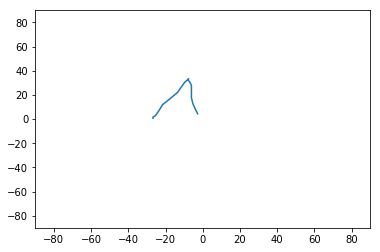

66
67


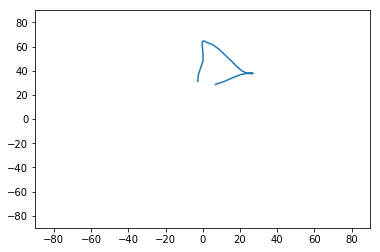

68


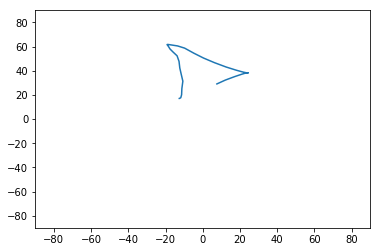

69


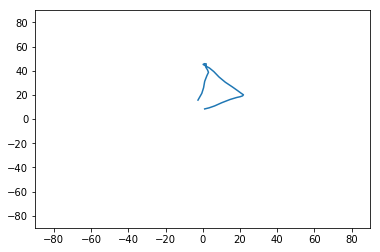

70


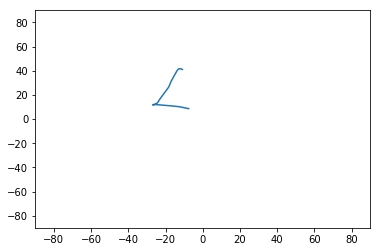

71
72
73
74
75
76
77


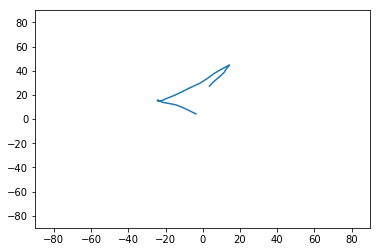

78


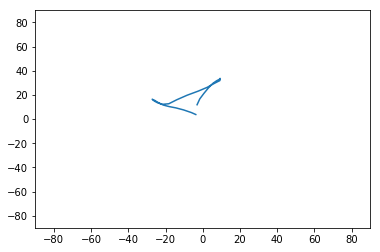

79


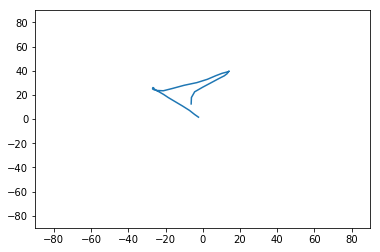

80


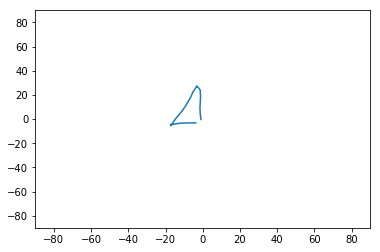

81


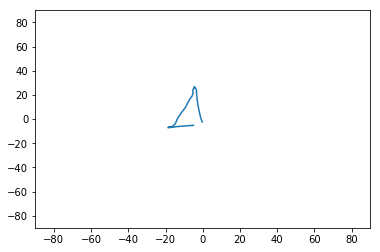

82


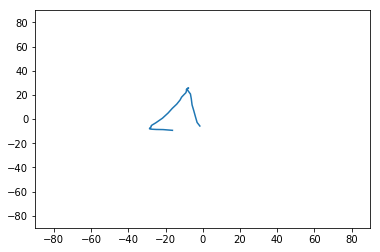

83


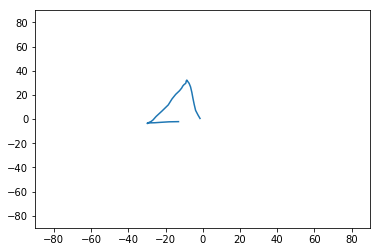

84


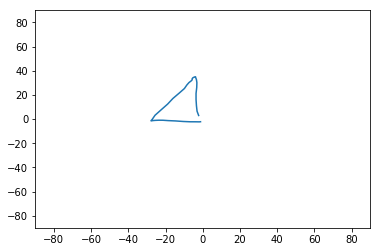

85


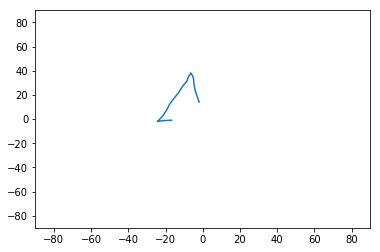

86


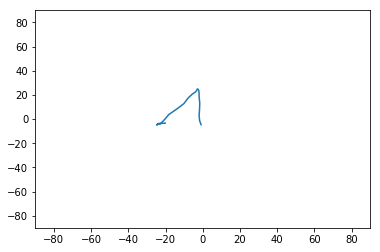

87


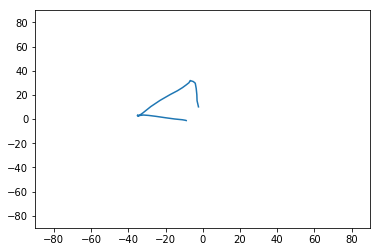

88


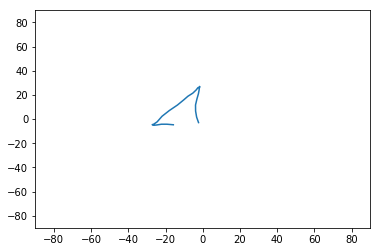

89


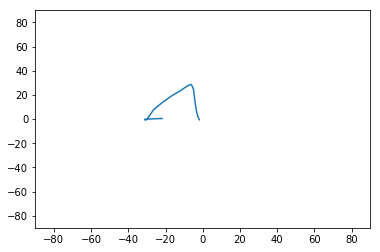

90


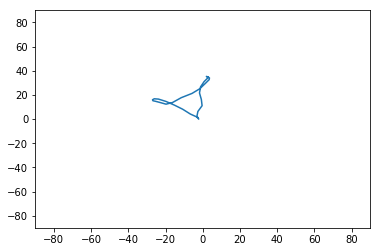

91


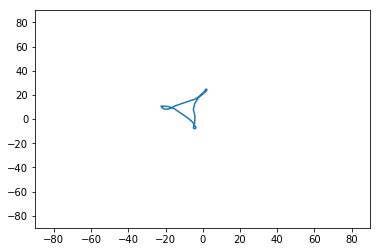

92


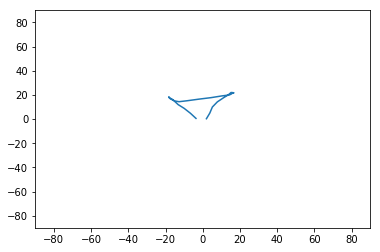

93


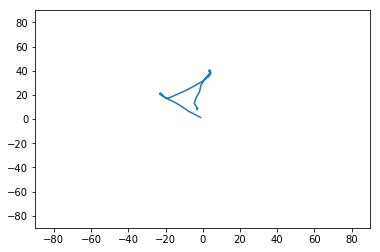

94


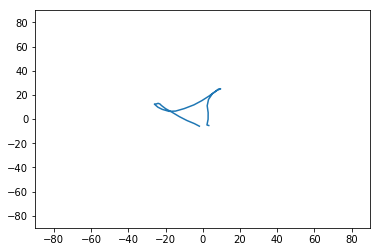

95


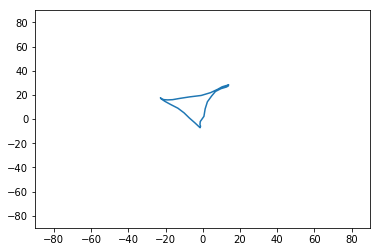

96


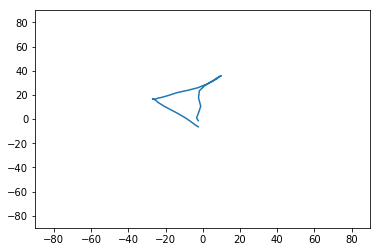

97


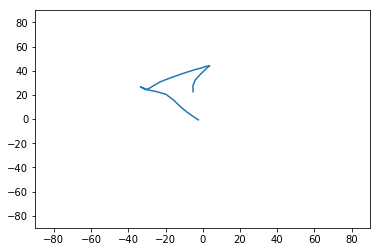

98
99


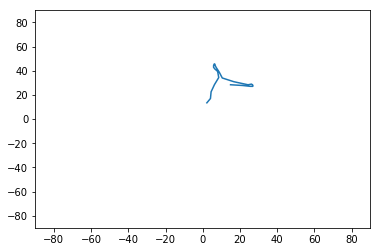

100


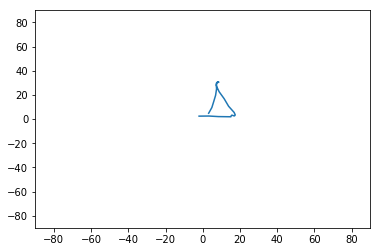

101


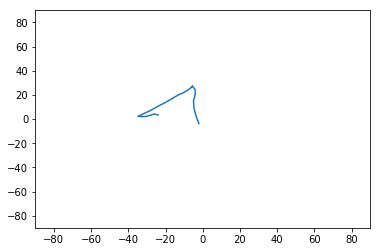

102


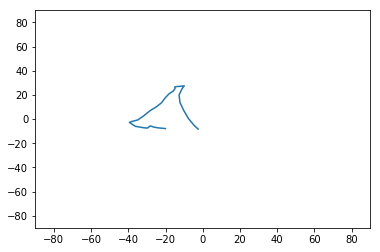

103


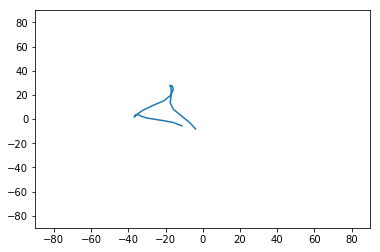

104


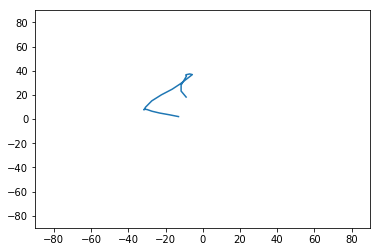

105


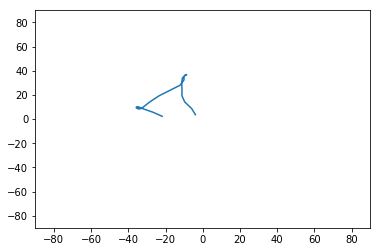

106


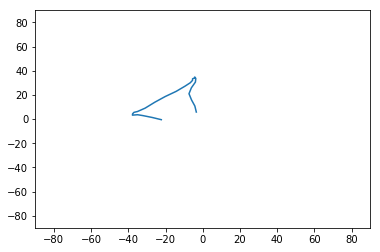

107


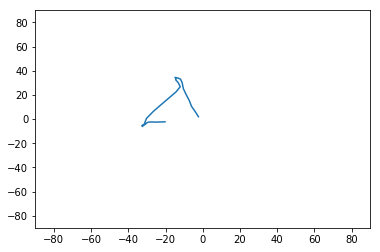

108


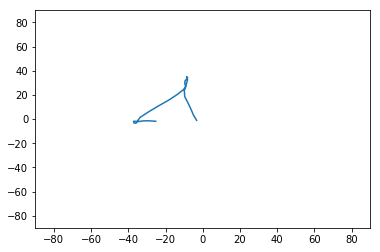

109


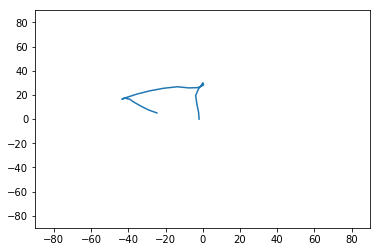

110


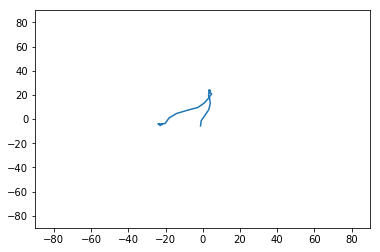

111


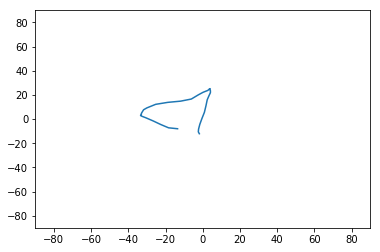

112


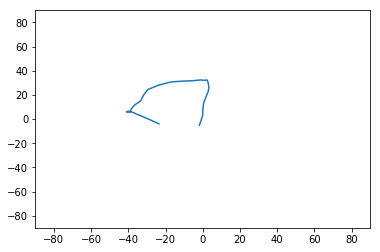

113


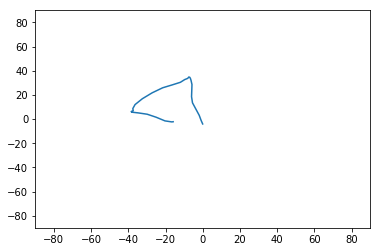

114
115


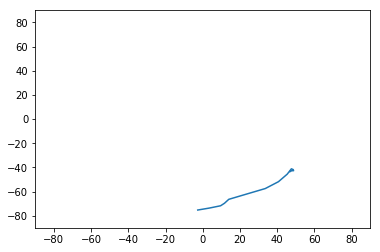

116


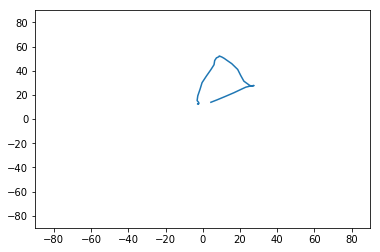

117


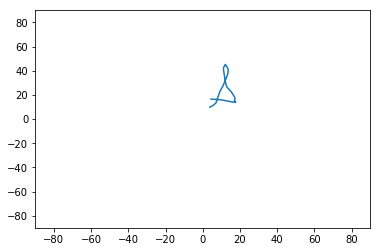

118


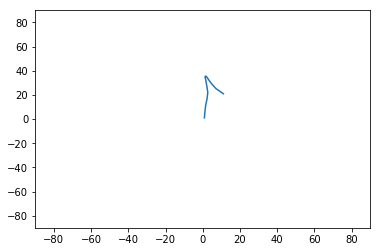

119
120


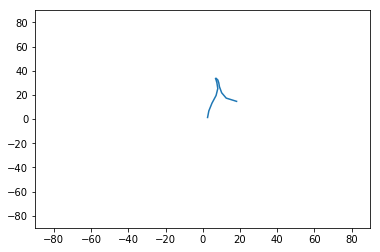

121
122


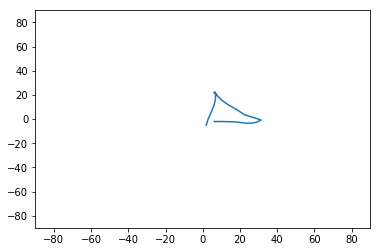

123


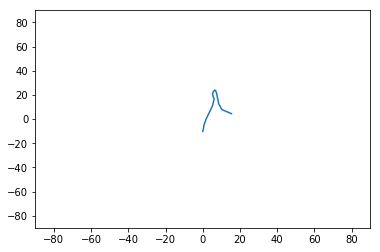

124


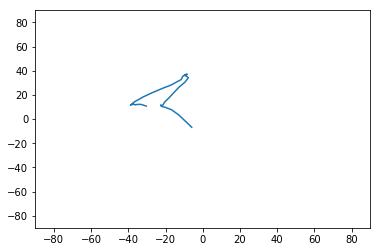

125


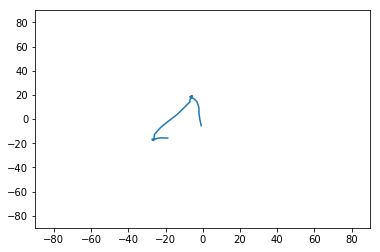

126


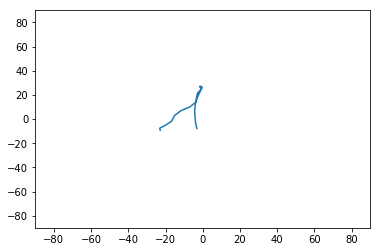

127


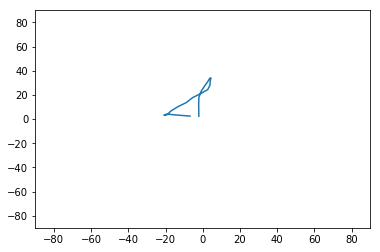

128


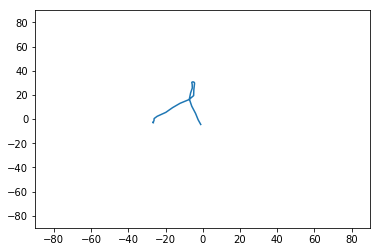

129


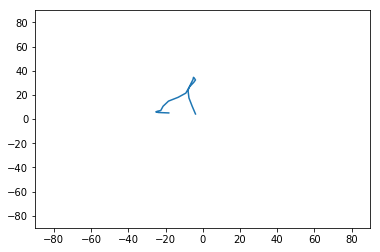

130


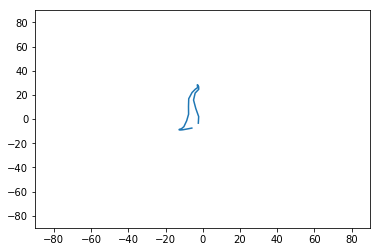

131


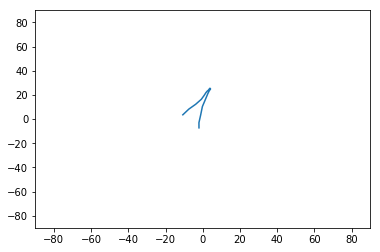

132
133


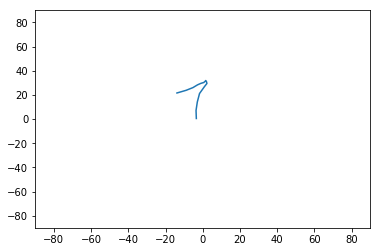

134
135
136
137


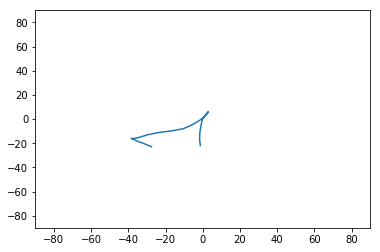

138


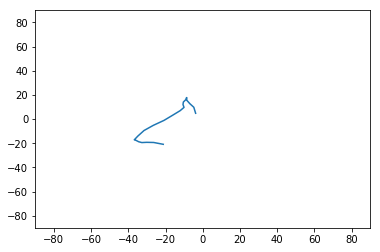

139
140
141


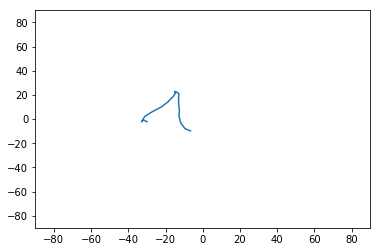

142


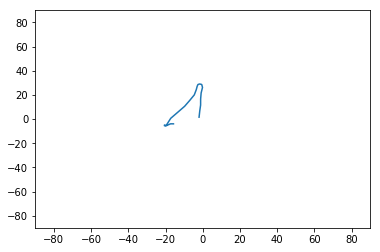

143
144
145


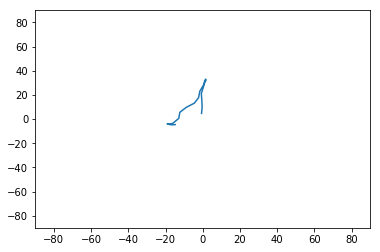

146


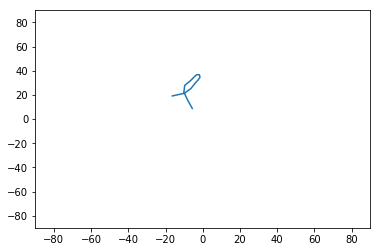

147
148
149
150
151
152


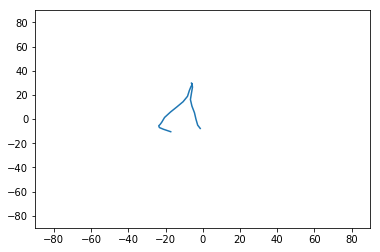

153
154


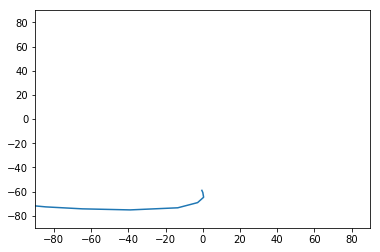

155


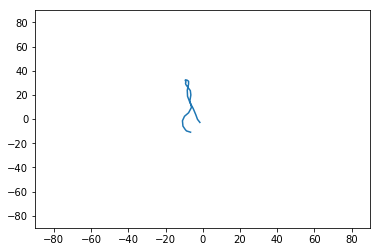

156
157
158
159


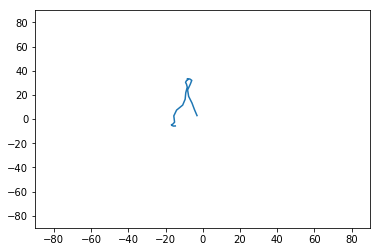

160


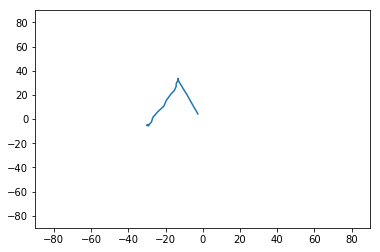

161


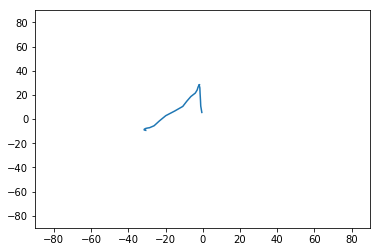

162


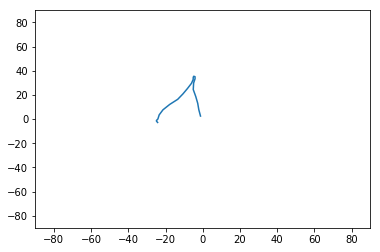

163
164
165
166
167


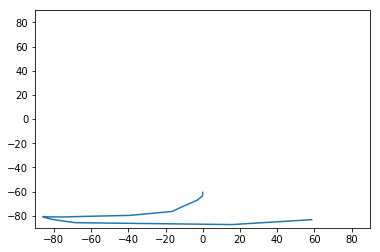

168


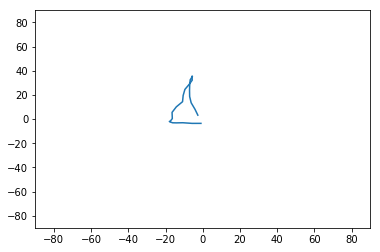

169


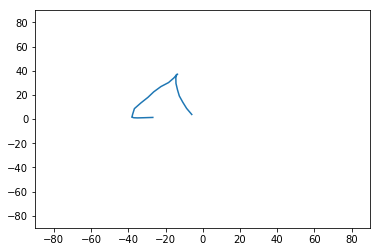

170


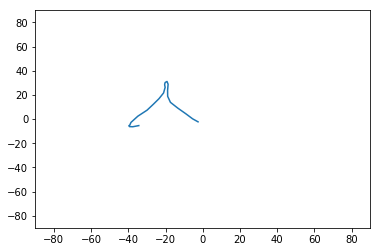

171


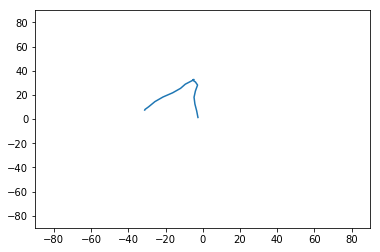

172


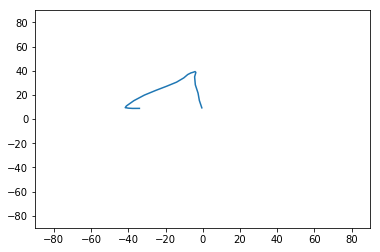

173


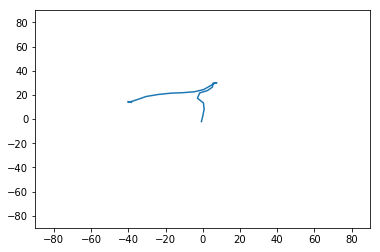

174


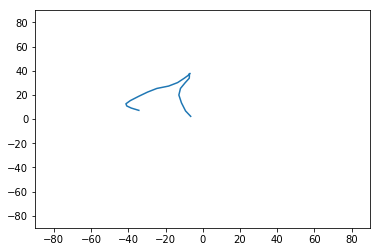

175


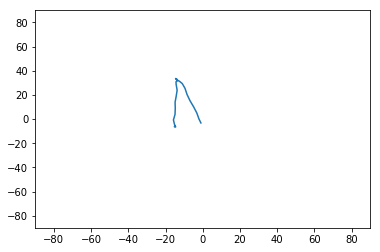

176


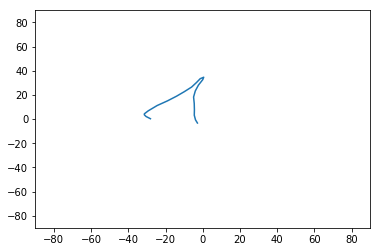

177
178
179


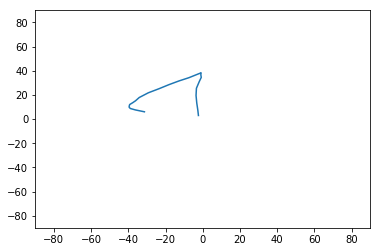

180


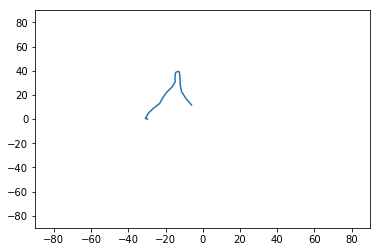

181


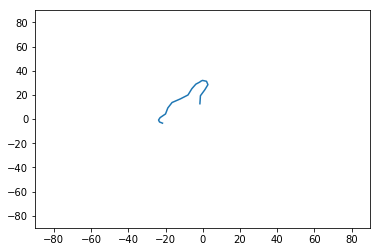

182
183
184


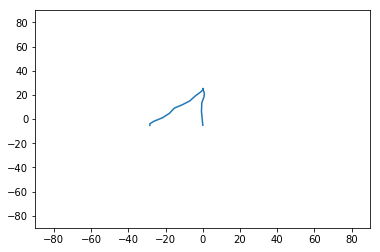

185
186
187
188
189
190
191
192
193
194
195


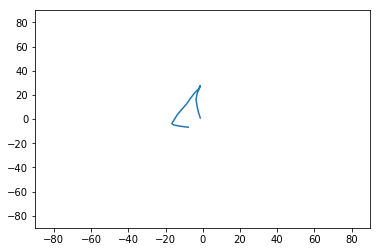

196


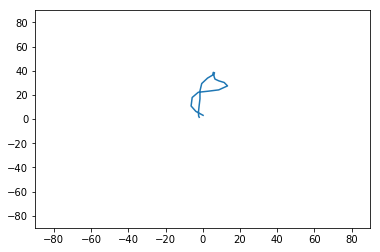

197


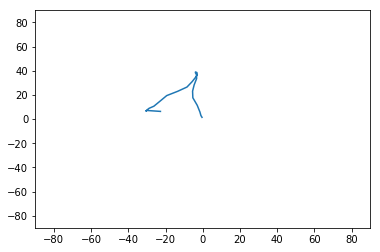

198


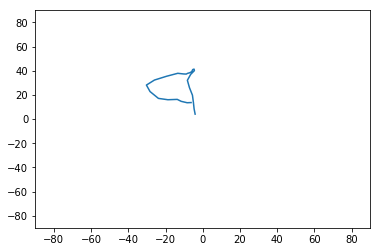

199


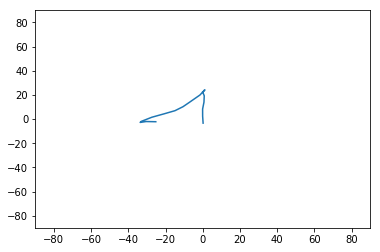

200


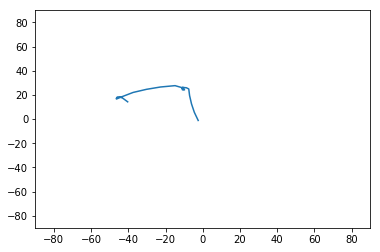

201


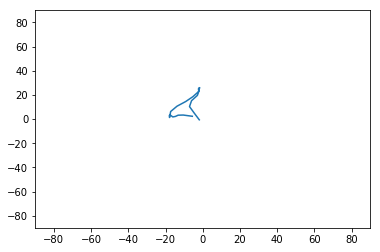

202


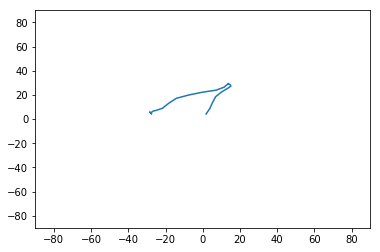

203
204
205
206
207
208
209
210
211


In [5]:
N_vert = 212
line_threshold = 15
for i in range(N_vert):
    print(i)
    visualize_file("data_for_recognition/accelerometer/up_triangle_%d.dat"%i, line_threshold)

# Creation of numpy dataset

In [6]:
def signal_filter(data, x1, x2):
    data = data.transpose()
    res = np.zeros_like(data)
    for i, x in enumerate(data):
        b, a = signal.butter(x1, x2)
        y = signal.filtfilt(b, a, x)
        res[i] = y
    return res.transpose()

def discretize_data(data, n_points):
    step = len(data) / n_points
    data = data.transpose()
    res = np.zeros((data.shape[0], n_points))
    for i, x in enumerate(data):
        for j in range(n_points):
            res[i, j] = np.mean(data[i, int(j * step):int((j+1) * step)])
    return res.transpose()

def create_data_set(files, n_points):
    N = len(files)
    data = np.zeros((N, n_points, 6))
    for i, file in enumerate(files):
        row_data = []
        with open(file,'r') as f:
            for line in f:
                result = re.findall(r"-?\d+.\d+", line)
                if len(result) == 10:
                    row_data.append([float(x) for x in result])
        
        smooth_data = signal_filter(np.array(row_data)[:,1:7], 3, 0.2) 
        
        data[i] = discretize_data(smooth_data, n_points)
    return data

In [7]:
file_name = "data_for_recognition/accelerometer/vertical_%d.dat"
n_points = 15
files = [file_name%i for i in range(103) if i not in bad_img_vert and number_of_lines(file_name % i) > n_points]
data = create_data_set(files, n_points)

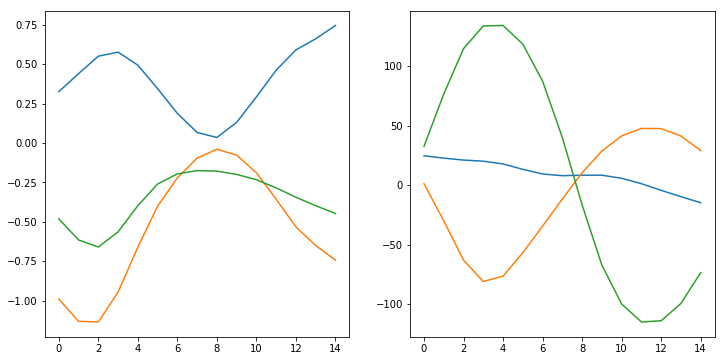

In [7]:
def visualize_data_set(data):
    for traj in data:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].plot(traj[:, 0])
        ax[0].plot(traj[:, 1])
        ax[0].plot(traj[:, 2])
        
        ax[1].plot(traj[:, 3])
        ax[1].plot(traj[:, 4])
        ax[1].plot(traj[:, 5])
        plt.show()
        
visualize_data_set([np.mean(data, axis=0)])

In [8]:
# visualize_data_set(data)

## Creation big data for all classes

In [9]:
n_points = 15
img_class = [{"class_name":"circle", "file_name":"accelerometercircle", "num_img":394, "bad_img":bad_img_circl},
          {"class_name":"horizontal", "file_name":"horizontal", "num_img":97, "bad_img":bad_img_hor},
          {"class_name":"vertical", "file_name":"vertical", "num_img":103, "bad_img":bad_img_vert},
          {"class_name":"circle", "file_name":"circlesNEW", "num_img":146, "bad_img":[]},
          {"class_name":"horizontal", "file_name":"horizontalNEW", "num_img":296, "bad_img":[]},
          {"class_name":"vertical", "file_name":"verticalNEW", "num_img":371, "bad_img":[]},
          {"class_name":"up_triangle", "file_name":"up_triangle", "num_img":212, "bad_img":[]}]
        

file_name = "data_for_recognition/accelerometer/%s_%d.dat"
big_data = {}
for cl in img_class:
    img_name = cl["file_name"]
    files = [file_name%(img_name, i) for i in range(cl["num_img"])
             if i not in cl["bad_img"] and number_of_lines(file_name % (img_name, i)) > n_points]
    
    data = create_data_set(files, n_points)
#    big_data[cl["class_name"]] = np.concatenate((big_data.get(cl["class_name"], np.array([[[]]])), data))
    if not big_data.get(cl["class_name"], None) is None:
        big_data[cl["class_name"]] = np.concatenate((big_data[cl["class_name"]], data))
    else:
        big_data[cl["class_name"]] = data
    
np.save("data_for_recognition/accelerometer/big_data.npy", big_data)

In [29]:
# bd = np.load("data_for_recognition/accelerometer/big_data.npy")
# bd